# Iteration 1

In [300]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading csv files and Cleaning

In [41]:
df1 = pd.read_csv("bandoora.csv")
df1 = df1[['Year', 'Annual']] #selecting only two columns for final dataset
df1.columns = ['Year', 'Bandoora'] # changing column name from Annual to Bandoora
df1 = df1[df1['Year'] > 1990] #selecting around 30 years of data
df1['Bandoora'].fillna((df1['Bandoora'].mean()), inplace=True) #imputing null values with mean of the column

In [42]:
df2 = pd.read_csv('bendigo.csv')
df2 = df2[['Year', 'Annual']]
df2.columns = ['Year', 'Bendigo']
df2 = df2[df2['Year'] > 1990]
df2['Bendigo'].fillna((df2['Bendigo'].mean()), inplace=True) #imputing null values with mean of the column

In [43]:
df3 = pd.read_csv('echuca.csv')
df3 = df3[['Year', 'Annual']]
df3.columns = ['Year', 'Echuca']
df3 = df3[df3['Year'] > 1990]
df3['Echuca'].fillna((df3['Echuca'].mean()), inplace=True) #imputing null values with mean of the column

In [44]:
#df4 = pd.read_csv('falls creek.csv')
#df4 = df4[['Year', 'Annual']]
#df4.columns = ['Year', 'Falls Creek']
#df4 = df4[df4['Year'] > 1990]
#df4['Falls Creek'].fillna((df4['Falls Creek'].mean()), inplace=True)

In [45]:
df5 = pd.read_csv('mildura.csv')
df5 = df5[['Year', 'Annual']]
df5.columns = ['Year', 'Mildura']
df5 = df5[df5['Year'] > 1990]
df5['Mildura'].fillna((df5['Mildura'].mean()), inplace=True) #imputing null values with mean of the column

In [46]:
#df6 = pd.read_csv('portland.csv')
#df6 = df6[['Year', 'Annual']]
#df6.columns = ['Year', 'Portland']
#df6 = df6[df6['Year'] > 1990]
#df6['Portland'].fillna((df6['Portland'].mean()), inplace=True)

In [47]:
df7 = pd.read_csv('Traralgon.csv')
df7 = df7[['Year', 'Annual']]
df7.columns = ['Year', 'Traralgon']
df7 = df7[df7['Year'] > 1990]
df7['Traralgon'].fillna((df7['Traralgon'].mean()), inplace=True) #imputing null values with mean of the column

In [48]:
df8 = pd.read_csv('walpeup.csv')
df8 = df8[['Year', 'Annual']]
df8.columns = ['Year', 'Walpeup']
df8 = df8[df8['Year'] > 1990]
df8['Walpeup'].fillna((df8['Walpeup'].mean()), inplace=True) #imputing null values with mean of the column

## Merging data frames with left join

In [49]:
df_merge = df1.merge(df2, how='left') 

In [50]:
df_merge = df_merge.merge(df3, how='left')

In [51]:
#df_merge = df_merge.merge(df4, how='left')

In [52]:
df_merge = df_merge.merge(df5, how='left')

In [53]:
#df_merge = df_merge.merge(df6, how='left')

In [54]:
df_merge = df_merge.merge(df7, how='left')

In [55]:
df_merge = df_merge.merge(df8, how='left')

In [18]:
#a = df_merge.set_index('Year')

In [56]:
a = df_merge.round(1) #rounding values to 1 decimal to get proper observations

In [169]:
a.to_csv('temp.csv') #generating new csv file with cleaned dataset

In [ ]:
#df = df_merge.round(1)

In [58]:
b = pd.melt(a, id_vars = ['Year']) #using melt function for visualising data

In [127]:
b.describe()

,Year,value
count,168.000000,168.000000
mean,2004.500000,22.119643
std,8.101896,1.840634
min,1991.000000,18.600000
25%,1997.750000,20.575000
50%,2004.500000,22.000000
75%,2011.250000,23.700000
max,2018.000000,25.800000


## Visualising data using seaborn library

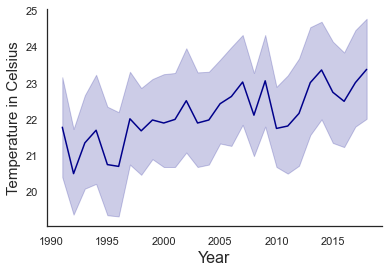

In [385]:
sns.lineplot(data=b, x='Year', y='value', color='darkblue', size_norm=(10,10))
plt.xlabel("Year", size=16)
plt.ylabel("Temperature in Celsius", size=15)
sns.despine()
plt.savefig('Temperature.png', dpi=300)